In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Chargement de VGG16

In [3]:
base_model = VGG16(weights='imagenet',
                   include_top=False, 
                   input_shape=(224, 224, 3))

# Geler les couches du modèle pré-entraîné

In [7]:
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées

In [10]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compilation de modèle

In [13]:
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

# Augmentation des données

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
# (pas d'augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des données d'entrainement et validation

In [19]:
train_generator = train_datagen.flow_from_directory(
    '../Transfer_Learning/trainset',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 3000 images belonging to 2 classes.


In [21]:
validation_generator = validation_datagen.flow_from_directory(
    '../Transfer_Learning/validset',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


# Entraînement du modèle 

In [28]:
start_time = time.time()

# entraînement du modèle 
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size
)
end_time = time.time()

# Calcul du temps total d'entraînement 
print(f"Training completed in {(end_time - start_time):.2f} seconds")

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 719s 8s/step - accuracy: 0.6640 - loss: 0.6796 - val_accuracy: 0.8690 - val_loss: 0.2884
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8438 - loss: 0.4096 - val_accuracy: 0.8750 - val_loss: 0.2225
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 494s 5s/step - accuracy: 0.8432 - loss: 0.3455 - val_accuracy: 0.9073 - val_loss: 0.2143
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9375 - loss: 0.2567 - val_accuracy: 0.8750 - val_loss: 0.1801
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 491s 5s/step - accuracy: 0.8767 - loss: 0.2864 - val_accuracy: 0.8841 - val_loss: 0.2685
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9062 - loss: 0.1890 - val_accuracy: 0.8750 - val_loss: 0.2211
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 512s 6s/step - accuracy: 0.8738 - loss: 0.3037 - val_accuracy: 0.9002 - val_loss: 0.2228
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9375 - loss: 0.1443 - val_accuracy: 0.8750 - va

# Évaluation lu modèle

In [30]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}, Accuracy: {accuracy *100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.9137 - loss: 0.1973
Loss: 0.1907556802034378, Accuracy: 91.60%


In [38]:
def predict(model, image_path):
    
    # Charger et préparer l'image
    img = load_img(image_path, target_size=(224, 224))  
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  

    # Prédire la probabilité pour chaque classe
    prediction = model.predict(img_array)[0][0]  
    
    predicted_class_name = "chien" if prediction > 0.5 else "chat"

    # afficher l'image
    plt.figure(figsize=(6, 6))
    plt.imshow(load_img(image_path))  
    plt.title(f"Prédit : {predicted_class_name}", fontsize=16)
    plt.axis("off")  
    plt.show()

    print(f"Probabilité prédite : {prediction:.2f}")
    print(f"Classe prédite : {predicted_class_name}")
    return predicted_class_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


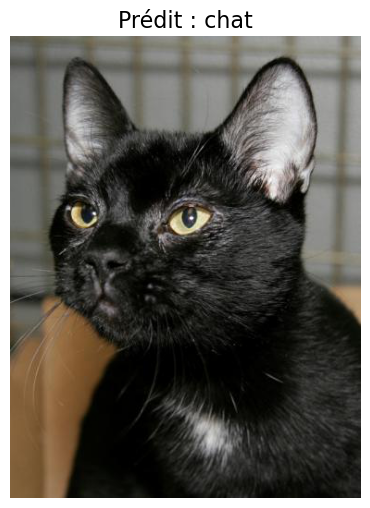

Probabilité prédite : 0.00
Classe prédite : chat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


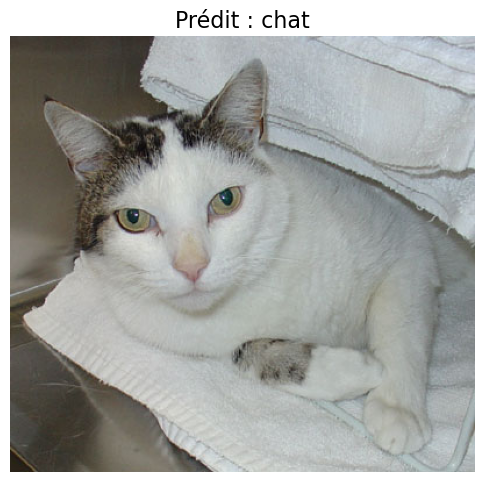

Probabilité prédite : 0.00
Classe prédite : chat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


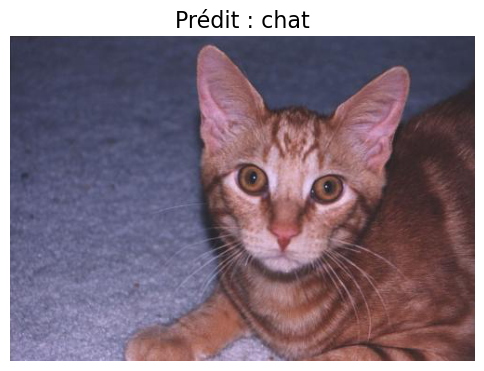

Probabilité prédite : 0.00
Classe prédite : chat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


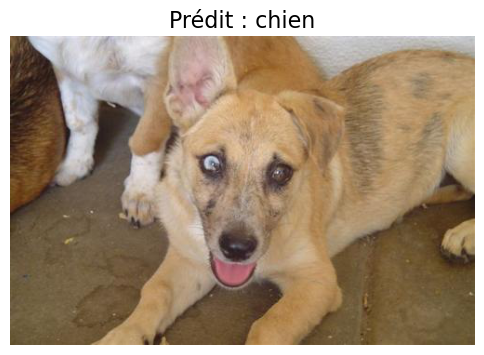

Probabilité prédite : 0.99
Classe prédite : chien
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


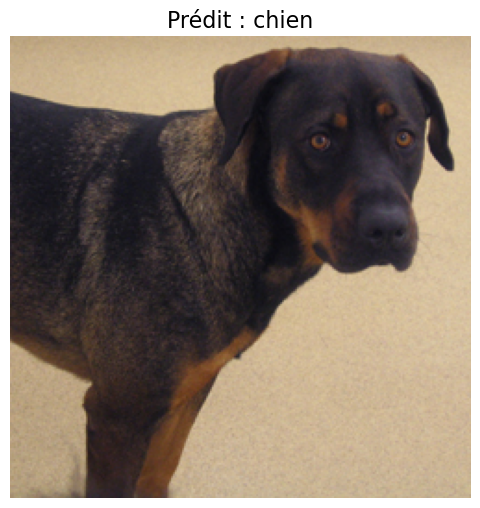

Probabilité prédite : 0.91
Classe prédite : chien
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


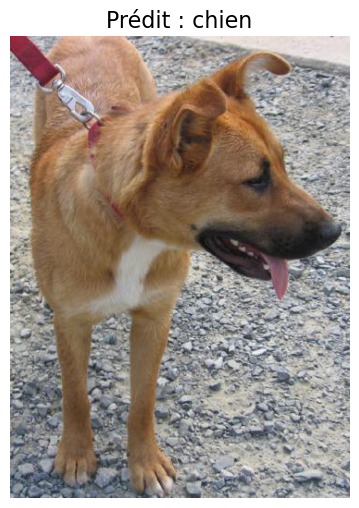

Probabilité prédite : 1.00
Classe prédite : chien


In [48]:
# Exemples :
image_paths = [
    "10249.jpg",  
    "106.jpg",
    "107.jpg",
    "11327.jpg",
    "11329.jpg",
    "11331.jpg"
]
for image_path in image_paths:
    predict(model, image_path)